In [246]:
import re
import csv
import pandas as pd
import matplotlib.pyplot as pltb
import itertools

In [247]:
with open('./pubmed-MEG3_465-set.txt','r', encoding ='utf-8-sig') as f:
    texto = f.read()

In [248]:
texto1 = re.findall(r"\,\s[A-Z]+[A-z]{2,11}\.", texto)

In [249]:
unique_text =list(set(texto1))
unique_text.sort()
a = unique_text
print(a[:50])

[', Basel.', ', Belgium.', ', Canada.', ', China.', ', France.', ', Germany.', ', Inc.', ', India.', ', Iran.', ', Italy.', ', Japan.', ', Pakistan.', ', Taiwan.', ', USA.']


In [250]:
b = unique_text
b.remove(', Basel.')
b.remove(', Inc.')

In [251]:
print() 
print('Lista de países: ', b)


Lista de países:  [', Belgium.', ', Canada.', ', China.', ', France.', ', Germany.', ', India.', ', Iran.', ', Italy.', ', Japan.', ', Pakistan.', ', Taiwan.', ', USA.']


In [252]:
    c = "".join(b)
    d = c.split(", ")
    e = "".join(d)
    f = e.split(".")
    f.remove("")
    g = f
    print()
    print('Lista def paises definitiva: ', g)


Lista def paises definitiva:  ['Belgium', 'Canada', 'China', 'France', 'Germany', 'India', 'Iran', 'Italy', 'Japan', 'Pakistan', 'Taiwan', 'USA']


In [254]:
data = pd.read_csv('./2_Paises_ubicacion.csv', engine='python', skipfooter=3)
data.head(10)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [255]:
name = data[data.name.isin(g)]
name.head(10)

,country,latitude,longitude,name
19,BE,50.503887,4.469936,Belgium
35,CA,56.130366,-106.346771,Canada
45,CN,35.861660,104.195397,China
53,DE,51.165691,10.451526,Germany
71,FR,46.227638,2.213749,France
102,IN,20.593684,78.962880,India
105,IR,32.427908,53.688046,Iran
107,IT,41.871940,12.567380,Italy
111,JP,36.204824,138.252924,Japan
174,PK,30.375321,69.345116,Pakistan


In [256]:
paises = data[data.country.isin(g)]
all_data =pd.concat([name,paises]).drop_duplicates().sort_values('name')
all_data.head(10)

,country,latitude,longitude,name
19,BE,50.503887,4.469936,Belgium
35,CA,56.130366,-106.346771,Canada
45,CN,35.861660,104.195397,China
71,FR,46.227638,2.213749,France
53,DE,51.165691,10.451526,Germany
102,IN,20.593684,78.962880,India
105,IR,32.427908,53.688046,Iran
107,IT,41.871940,12.567380,Italy
111,JP,36.204824,138.252924,Japan
174,PK,30.375321,69.345116,Pakistan


In [259]:
import matplotlib.pyplot as plt

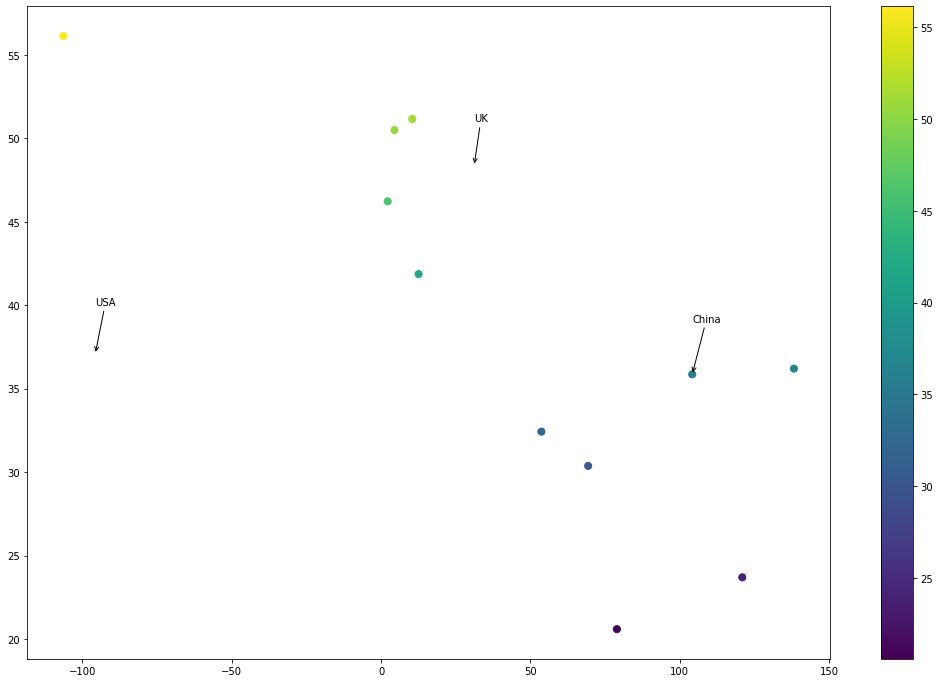

In [271]:
pltb.scatter(all_data.longitude, all_data.latitude, s=50, c=all_data.latitude)
pltb.colorbar()

ard = dict(arrowstyle="->")

pltb.annotate('UK', xy = (31.16558,48.379433), 
               xytext = (31.16558,51), arrowprops= ard)

pltb.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard)

pltb.annotate('Brasil', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard)

pltb.annotate('Australia', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard)

pltb.annotate('Noruega', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard)

pltb.annotate('China', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard)

params = pltb.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )

pltb.savefig("Map of Science.png")